In [1]:
import numpy as np
import pandas as pd

In [50]:

## import the rating with isbn and user-id data
rating = pd.read_csv('../input/bookcrossing/BX-Book-Ratings.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1') #encoding = "latin-1"

In [51]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [52]:
# ISBN 	Book-Title Book-author
books = pd.read_csv('../input/bookcrossing/BX-Books.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1') #encoding = "latin-1"

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:30

In [53]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [54]:
users = pd.read_csv('../input/bookcrossing/BX-Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1') #encoding = "latin-1"

In [57]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [58]:
rating['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

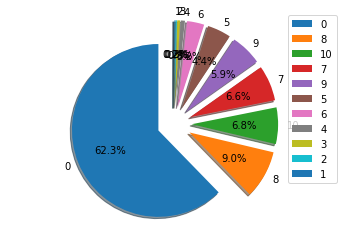

In [81]:
import matplotlib.pyplot as plt
r = pd.DataFrame(rating['Book-Rating'].value_counts())
labels = list(r.index)
data = list(r['Book-Rating'])
explode = (0.2, 0.2, 0.2,.2,.2,.2,.2,.2,.2,.2,.2)
fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

In [82]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [83]:
rating_count = pd.DataFrame(rating.groupby('ISBN')['Book-Rating'].count())

In [84]:
rating_count

,Book-Rating
ISBN,
0330299891,2
0375404120,2
0586045007,1
9022906116,2
9032803328,1
...,...
cn113107,1
ooo7156103,1
§423350229,1


In [85]:
most_rated = rating_count.sort_values('Book-Rating',ascending=False)

In [86]:
most_rated

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
...,...
0801064090,1
0801064252,1
0801064279,1


In [87]:
top = most_rated.head()
top

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


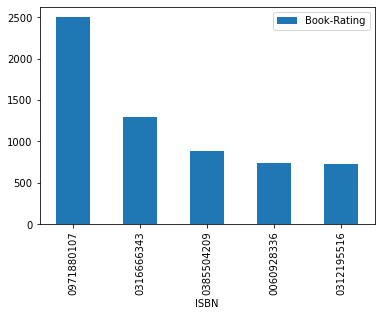

In [88]:
top.plot(kind='bar')

In [89]:
books = books[['ISBN','Book-Title','Book-Author']]

In [90]:
books.head()

,ISBN,Book-Title,Book-Author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [91]:
final = pd.merge(top,books,on='ISBN')

In [92]:
final = final.head()

In [93]:
final

,ISBN,Book-Rating,Book-Title,Book-Author
0,0971880107,2502,Wild Animus,Rich Shapero
1,0316666343,1295,The Lovely Bones: A Novel,Alice Sebold
2,0385504209,883,The Da Vinci Code,Dan Brown
3,0060928336,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells
4,0312195516,723,The Red Tent (Bestselling Backlist),Anita Diamant


<BarContainer object of 5 artists>

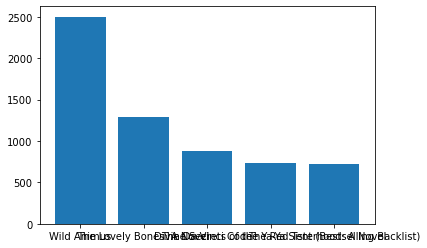

In [94]:
plt.bar(final['Book-Title'],final['Book-Rating'])

<BarContainer object of 5 artists>

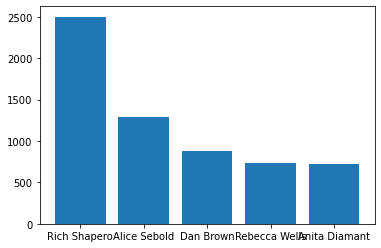

In [95]:
plt.bar(final['Book-Author'],final['Book-Rating'])

In [96]:
## find the average rating
new_rating = pd.DataFrame(rating.groupby('ISBN')['Book-Rating'].mean())

In [97]:
new_rating.head()

,Book-Rating
ISBN,
0330299891,3.0
0375404120,1.5
0586045007,0.0
9022906116,3.5
9032803328,0.0


In [76]:
new_rating['rating_count'] = pd.DataFrame(rating.groupby('ISBN')['Book-Rating'].count())

In [100]:
new_rating

,Book-Rating
ISBN,
0330299891,3.0
0375404120,1.5
0586045007,0.0
9022906116,3.5
9032803328,0.0
...,...
cn113107,0.0
ooo7156103,7.0
§423350229,0.0


In [78]:
final1 = new_rating.sort_values('rating_count',ascending=False).head()

In [79]:
final1

,Book-Rating,rating_count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [80]:
final = pd.merge(final1,books,on='ISBN')

In [32]:
final

,ISBN,Book-Rating,rating_count,Book-Title,Book-Author
0,0971880107,1.019584,2502,Wild Animus,Rich Shapero
1,0316666343,4.468726,1295,The Lovely Bones: A Novel,Alice Sebold
2,0385504209,4.652322,883,The Da Vinci Code,Dan Brown
3,0060928336,3.448087,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells
4,0312195516,4.334716,723,The Red Tent (Bestselling Backlist),Anita Diamant


In [43]:
rating = rating[:500]

In [44]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
95,276798,3499134004,0
96,276798,349915398X,0
97,276798,3548603203,6
98,276798,3764501383,0


In [45]:
places_crosstab = pd.pivot_table(data=rating,values='Book-Rating',index='User-ID',columns='ISBN')

In [46]:
places_crosstab

ISBN,0006379702,0060517794,0099543818,0140279091,0155061224,0330332775,0330367358,033390804X,034544003X,0345443683,...,8466300821,847765011X,8478442588,8484330478,8484332039,8495368099,9029716894,9057868059,B0000BLD7X,N3453124715
User-ID,,,,,,,,,,,,,,,,,,,,,
276725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276726,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
## too much data memory error shown
## but whet we do
## is we already find the best book
## and make a cross tab with the book and the ISBN
## now we make this
## then we find all the rating that is given by the user to the topmost book


## then we find the simmilar book with the cross tabb by passing the top book rating 
## with corrwith function
## this is a test example
## this wil give use the pearson_r coeffieient
## then we group in assending way
## and take the first 5 that will positively related to the best book
## this how

#similler_tortas = places_crosstab.corrwith(tortas_rating)
#corr_tortus = pd.DataFrame(similler_tortas,columns=["pearson_r"])
#corr_tortus.dropna(inplace=True)
#corr_tortus.sort_values(ascending=False)
#corr_tortus.head()
## then all the list will be correlated with this book


In [102]:
# take a look of this url with small data
## we did it in the exact same way

[Collaborative Rating Based Classifier](http://www.kaggle.com/heartbeat007/recomendation-system-algorithm)